In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.simplefilter('ignore', FutureWarning)

## Data Pre-Processing

In [2]:
#Testing for CVD, using max reduced csv file
heart_cvd = pd.read_csv('max_reduce.csv')
#SEX, AGE, CIGPDAY, HEARTRTE, SYSBP, BPMEDS, TOTCHOL, BMI, GLUCOSE, DIABETES, EDUC_2.0, EDUC_3.0, EDUC_4.0
#Use Matt's params: (age) + (cigs) (chol) (bmi) (glu) (hr) (bp) (female)
# Clean to columns needed
#heart_cvd = heart_cvd[['SEX','AGE','CIGPDAY','HEARTRTE','SYSBP','BPMEDS','TOTCHOL','BMI','GLUCOSE','DIABETES','CVD']]
heart_cvd = heart_cvd[['SEX','AGE','CIGPDAY','HEARTRTE','SYSBP','TOTCHOL','BMI','GLUCOSE','CVD']]
heart_cvd.head()

,SEX,AGE,CIGPDAY,HEARTRTE,SYSBP,TOTCHOL,BMI,GLUCOSE,CVD
0,1,39,0.0,80.0,106.0,195.0,26.97,77.0,1
1,2,46,0.0,95.0,121.0,250.0,28.73,76.0,0
2,2,52,0.0,80.0,105.0,260.0,29.43,86.0,0
3,2,58,0.0,80.0,108.0,237.0,28.50,71.0,0
4,1,48,20.0,75.0,127.5,245.0,25.34,70.0,0


In [3]:
#Encode SEX column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
heart_cvd['SEX'] = label_encoder.fit_transform(heart_cvd['SEX'])

In [4]:
#Get dummies for educ col, drop first
#heart_cvd = pd.get_dummies(heart_cvd,columns=['EDUC'],drop_first=True)
#heart_cvd.head()

In [5]:
#Set up for CVD to test
X = heart_cvd.drop("CVD", axis=1)
y = heart_cvd["CVD"]
print(X.shape, y.shape)

(9310, 8) (9310,)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y)
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

x_val = X_train_scaled[:4655]
partial_x_train = X_train_scaled[4655:]

In [7]:
#Split training data 50/50 for validation run
y_val = y_train[:4655]
partial_y_train = y_train[4655:]

# Create Deep Learning Models

In [8]:
#First validation model
from keras.models import Sequential
from keras.layers import Dense

valid_model = Sequential()
valid_model.add(Dense(units=7, activation='relu', input_dim=8))
valid_model.add(Dense(units=1, activation='sigmoid'))

from keras.metrics import categorical_accuracy
valid_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
valid = valid_model.fit(
    partial_x_train,
    partial_y_train,
    epochs=500,
    shuffle=True,
    validation_data=(x_val, y_val),
    verbose=2
)

Using TensorFlow backend.


Train on 2327 samples, validate on 4655 samples
Epoch 1/500
 - 0s - loss: 0.5996 - acc: 0.7048 - val_loss: 0.5713 - val_acc: 0.7340
Epoch 2/500
 - 0s - loss: 0.5699 - acc: 0.7301 - val_loss: 0.5454 - val_acc: 0.7512
Epoch 3/500
 - 0s - loss: 0.5522 - acc: 0.7361 - val_loss: 0.5311 - val_acc: 0.7534
Epoch 4/500
 - 0s - loss: 0.5416 - acc: 0.7400 - val_loss: 0.5219 - val_acc: 0.7527
Epoch 5/500
 - 0s - loss: 0.5348 - acc: 0.7391 - val_loss: 0.5165 - val_acc: 0.7512
Epoch 6/500
 - 0s - loss: 0.5305 - acc: 0.7374 - val_loss: 0.5136 - val_acc: 0.7527
Epoch 7/500
 - 0s - loss: 0.5277 - acc: 0.7396 - val_loss: 0.5113 - val_acc: 0.7536
Epoch 8/500
 - 0s - loss: 0.5257 - acc: 0.7413 - val_loss: 0.5104 - val_acc: 0.7523
Epoch 9/500
 - 0s - loss: 0.5242 - acc: 0.7426 - val_loss: 0.5094 - val_acc: 0.7545
Epoch 10/500
 - 0s - loss: 0.5229 - acc: 0.7430 - val_loss: 0.5083 - val_acc: 0.7566
Epoch 11/500
 - 0s - loss: 0.5219 - acc: 0.7460 - val_loss: 0.5077 - val_acc: 0.7557
Epoch 12/500
 - 0s - loss:

Epoch 97/500
 - 0s - loss: 0.5064 - acc: 0.7546 - val_loss: 0.5016 - val_acc: 0.7545
Epoch 98/500
 - 0s - loss: 0.5064 - acc: 0.7520 - val_loss: 0.5017 - val_acc: 0.7540
Epoch 99/500
 - 0s - loss: 0.5065 - acc: 0.7516 - val_loss: 0.5015 - val_acc: 0.7538
Epoch 100/500
 - 0s - loss: 0.5062 - acc: 0.7546 - val_loss: 0.5014 - val_acc: 0.7549
Epoch 101/500
 - 0s - loss: 0.5063 - acc: 0.7508 - val_loss: 0.5016 - val_acc: 0.7536
Epoch 102/500
 - 0s - loss: 0.5062 - acc: 0.7508 - val_loss: 0.5016 - val_acc: 0.7534
Epoch 103/500
 - 0s - loss: 0.5061 - acc: 0.7533 - val_loss: 0.5017 - val_acc: 0.7536
Epoch 104/500
 - 0s - loss: 0.5063 - acc: 0.7516 - val_loss: 0.5015 - val_acc: 0.7532
Epoch 105/500
 - 0s - loss: 0.5060 - acc: 0.7542 - val_loss: 0.5015 - val_acc: 0.7536
Epoch 106/500
 - 0s - loss: 0.5062 - acc: 0.7503 - val_loss: 0.5015 - val_acc: 0.7534
Epoch 107/500
 - 0s - loss: 0.5062 - acc: 0.7520 - val_loss: 0.5016 - val_acc: 0.7545
Epoch 108/500
 - 0s - loss: 0.5059 - acc: 0.7520 - val_lo

Epoch 193/500
 - 0s - loss: 0.5034 - acc: 0.7525 - val_loss: 0.5015 - val_acc: 0.7547
Epoch 194/500
 - 0s - loss: 0.5036 - acc: 0.7516 - val_loss: 0.5013 - val_acc: 0.7557
Epoch 195/500
 - 0s - loss: 0.5035 - acc: 0.7508 - val_loss: 0.5015 - val_acc: 0.7547
Epoch 196/500
 - 0s - loss: 0.5035 - acc: 0.7516 - val_loss: 0.5018 - val_acc: 0.7549
Epoch 197/500
 - 0s - loss: 0.5034 - acc: 0.7512 - val_loss: 0.5012 - val_acc: 0.7547
Epoch 198/500
 - 0s - loss: 0.5036 - acc: 0.7512 - val_loss: 0.5014 - val_acc: 0.7542
Epoch 199/500
 - 0s - loss: 0.5036 - acc: 0.7542 - val_loss: 0.5011 - val_acc: 0.7557
Epoch 200/500
 - 0s - loss: 0.5034 - acc: 0.7520 - val_loss: 0.5016 - val_acc: 0.7542
Epoch 201/500
 - 0s - loss: 0.5033 - acc: 0.7529 - val_loss: 0.5012 - val_acc: 0.7562
Epoch 202/500
 - 0s - loss: 0.5033 - acc: 0.7529 - val_loss: 0.5012 - val_acc: 0.7553
Epoch 203/500
 - 0s - loss: 0.5034 - acc: 0.7525 - val_loss: 0.5012 - val_acc: 0.7562
Epoch 204/500
 - 0s - loss: 0.5033 - acc: 0.7546 - val

Epoch 289/500
 - 0s - loss: 0.5019 - acc: 0.7559 - val_loss: 0.5016 - val_acc: 0.7562
Epoch 290/500
 - 0s - loss: 0.5019 - acc: 0.7555 - val_loss: 0.5016 - val_acc: 0.7553
Epoch 291/500
 - 0s - loss: 0.5019 - acc: 0.7559 - val_loss: 0.5017 - val_acc: 0.7547
Epoch 292/500
 - 0s - loss: 0.5017 - acc: 0.7563 - val_loss: 0.5017 - val_acc: 0.7557
Epoch 293/500
 - 0s - loss: 0.5018 - acc: 0.7563 - val_loss: 0.5017 - val_acc: 0.7553
Epoch 294/500
 - 0s - loss: 0.5018 - acc: 0.7568 - val_loss: 0.5020 - val_acc: 0.7549
Epoch 295/500
 - 0s - loss: 0.5019 - acc: 0.7572 - val_loss: 0.5019 - val_acc: 0.7551
Epoch 296/500
 - 0s - loss: 0.5017 - acc: 0.7559 - val_loss: 0.5016 - val_acc: 0.7557
Epoch 297/500
 - 0s - loss: 0.5016 - acc: 0.7572 - val_loss: 0.5021 - val_acc: 0.7549
Epoch 298/500
 - 0s - loss: 0.5018 - acc: 0.7550 - val_loss: 0.5017 - val_acc: 0.7547
Epoch 299/500
 - 0s - loss: 0.5015 - acc: 0.7585 - val_loss: 0.5017 - val_acc: 0.7557
Epoch 300/500
 - 0s - loss: 0.5018 - acc: 0.7546 - val

Epoch 385/500
 - 0s - loss: 0.5002 - acc: 0.7559 - val_loss: 0.5024 - val_acc: 0.7560
Epoch 386/500
 - 0s - loss: 0.5003 - acc: 0.7546 - val_loss: 0.5024 - val_acc: 0.7555
Epoch 387/500
 - 0s - loss: 0.5002 - acc: 0.7563 - val_loss: 0.5024 - val_acc: 0.7564
Epoch 388/500
 - 0s - loss: 0.5002 - acc: 0.7563 - val_loss: 0.5024 - val_acc: 0.7557
Epoch 389/500
 - 0s - loss: 0.5002 - acc: 0.7550 - val_loss: 0.5023 - val_acc: 0.7555
Epoch 390/500
 - 0s - loss: 0.5001 - acc: 0.7538 - val_loss: 0.5021 - val_acc: 0.7562
Epoch 391/500
 - 0s - loss: 0.5004 - acc: 0.7546 - val_loss: 0.5021 - val_acc: 0.7568
Epoch 392/500
 - 0s - loss: 0.5003 - acc: 0.7546 - val_loss: 0.5024 - val_acc: 0.7547
Epoch 393/500
 - 0s - loss: 0.5002 - acc: 0.7572 - val_loss: 0.5023 - val_acc: 0.7560
Epoch 394/500
 - 0s - loss: 0.5002 - acc: 0.7555 - val_loss: 0.5023 - val_acc: 0.7555
Epoch 395/500
 - 0s - loss: 0.5003 - acc: 0.7563 - val_loss: 0.5021 - val_acc: 0.7555
Epoch 396/500
 - 0s - loss: 0.5003 - acc: 0.7568 - val

Epoch 481/500
 - 0s - loss: 0.4993 - acc: 0.7581 - val_loss: 0.5021 - val_acc: 0.7545
Epoch 482/500
 - 0s - loss: 0.4991 - acc: 0.7602 - val_loss: 0.5019 - val_acc: 0.7553
Epoch 483/500
 - 0s - loss: 0.4991 - acc: 0.7550 - val_loss: 0.5017 - val_acc: 0.7551
Epoch 484/500
 - 0s - loss: 0.4992 - acc: 0.7598 - val_loss: 0.5017 - val_acc: 0.7557
Epoch 485/500
 - 0s - loss: 0.4993 - acc: 0.7581 - val_loss: 0.5018 - val_acc: 0.7549
Epoch 486/500
 - 0s - loss: 0.4992 - acc: 0.7585 - val_loss: 0.5020 - val_acc: 0.7547
Epoch 487/500
 - 0s - loss: 0.4992 - acc: 0.7581 - val_loss: 0.5017 - val_acc: 0.7557
Epoch 488/500
 - 0s - loss: 0.4991 - acc: 0.7602 - val_loss: 0.5022 - val_acc: 0.7545
Epoch 489/500
 - 0s - loss: 0.4990 - acc: 0.7602 - val_loss: 0.5023 - val_acc: 0.7540
Epoch 490/500
 - 0s - loss: 0.4991 - acc: 0.7585 - val_loss: 0.5019 - val_acc: 0.7545
Epoch 491/500
 - 0s - loss: 0.4991 - acc: 0.7585 - val_loss: 0.5023 - val_acc: 0.7549
Epoch 492/500
 - 0s - loss: 0.4993 - acc: 0.7585 - val

In [65]:
#Then training model
from keras.models import Sequential
from keras.layers import Dense

main_model = Sequential()
main_model.add(Dense(units=7, activation='relu', input_dim=8))
main_model.add(Dense(units=1, activation='sigmoid'))

from keras.metrics import categorical_accuracy
main_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
main = main_model.fit(
    #X_train_scaled,
    #y_train,
    partial_x_train,
    partial_y_train,
    epochs=310,
    shuffle=True,
    validation_data=(x_val, y_val),
    verbose=2
)

Train on 2327 samples, validate on 4655 samples
Epoch 1/310
 - 1s - loss: 0.8076 - acc: 0.4723 - val_loss: 0.7358 - val_acc: 0.5663
Epoch 2/310
 - 0s - loss: 0.7045 - acc: 0.5823 - val_loss: 0.6614 - val_acc: 0.6576
Epoch 3/310
 - 0s - loss: 0.6492 - acc: 0.6584 - val_loss: 0.6156 - val_acc: 0.7063
Epoch 4/310
 - 0s - loss: 0.6130 - acc: 0.6957 - val_loss: 0.5828 - val_acc: 0.7338
Epoch 5/310
 - 0s - loss: 0.5858 - acc: 0.7151 - val_loss: 0.5590 - val_acc: 0.7431
Epoch 6/310
 - 0s - loss: 0.5660 - acc: 0.7263 - val_loss: 0.5413 - val_acc: 0.7515
Epoch 7/310
 - 0s - loss: 0.5520 - acc: 0.7310 - val_loss: 0.5300 - val_acc: 0.7555
Epoch 8/310
 - 0s - loss: 0.5427 - acc: 0.7366 - val_loss: 0.5223 - val_acc: 0.7570
Epoch 9/310
 - 0s - loss: 0.5367 - acc: 0.7361 - val_loss: 0.5176 - val_acc: 0.7579
Epoch 10/310
 - 0s - loss: 0.5326 - acc: 0.7396 - val_loss: 0.5146 - val_acc: 0.7594
Epoch 11/310
 - 0s - loss: 0.5296 - acc: 0.7417 - val_loss: 0.5124 - val_acc: 0.7590
Epoch 12/310
 - 0s - loss:

Epoch 97/310
 - 0s - loss: 0.5072 - acc: 0.7520 - val_loss: 0.4969 - val_acc: 0.7521
Epoch 98/310
 - 0s - loss: 0.5070 - acc: 0.7520 - val_loss: 0.4974 - val_acc: 0.7521
Epoch 99/310
 - 0s - loss: 0.5069 - acc: 0.7499 - val_loss: 0.4970 - val_acc: 0.7515
Epoch 100/310
 - 0s - loss: 0.5069 - acc: 0.7508 - val_loss: 0.4971 - val_acc: 0.7508
Epoch 101/310
 - 0s - loss: 0.5066 - acc: 0.7520 - val_loss: 0.4970 - val_acc: 0.7519
Epoch 102/310
 - 0s - loss: 0.5067 - acc: 0.7495 - val_loss: 0.4971 - val_acc: 0.7512
Epoch 103/310
 - 0s - loss: 0.5065 - acc: 0.7490 - val_loss: 0.4974 - val_acc: 0.7532
Epoch 104/310
 - 0s - loss: 0.5067 - acc: 0.7508 - val_loss: 0.4973 - val_acc: 0.7525
Epoch 105/310
 - 0s - loss: 0.5065 - acc: 0.7486 - val_loss: 0.4970 - val_acc: 0.7519
Epoch 106/310
 - 0s - loss: 0.5065 - acc: 0.7495 - val_loss: 0.4970 - val_acc: 0.7521
Epoch 107/310
 - 0s - loss: 0.5065 - acc: 0.7482 - val_loss: 0.4971 - val_acc: 0.7530
Epoch 108/310
 - 0s - loss: 0.5064 - acc: 0.7503 - val_lo

Epoch 193/310
 - 0s - loss: 0.5026 - acc: 0.7533 - val_loss: 0.4980 - val_acc: 0.7553
Epoch 194/310
 - 0s - loss: 0.5030 - acc: 0.7520 - val_loss: 0.4978 - val_acc: 0.7549
Epoch 195/310
 - 0s - loss: 0.5025 - acc: 0.7542 - val_loss: 0.4978 - val_acc: 0.7549
Epoch 196/310
 - 0s - loss: 0.5028 - acc: 0.7533 - val_loss: 0.4978 - val_acc: 0.7547
Epoch 197/310
 - 0s - loss: 0.5024 - acc: 0.7555 - val_loss: 0.4980 - val_acc: 0.7547
Epoch 198/310
 - 0s - loss: 0.5025 - acc: 0.7542 - val_loss: 0.4978 - val_acc: 0.7557
Epoch 199/310
 - 0s - loss: 0.5025 - acc: 0.7542 - val_loss: 0.4983 - val_acc: 0.7545
Epoch 200/310
 - 0s - loss: 0.5025 - acc: 0.7525 - val_loss: 0.4982 - val_acc: 0.7551
Epoch 201/310
 - 0s - loss: 0.5024 - acc: 0.7550 - val_loss: 0.4980 - val_acc: 0.7549
Epoch 202/310
 - 0s - loss: 0.5022 - acc: 0.7568 - val_loss: 0.4981 - val_acc: 0.7545
Epoch 203/310
 - 0s - loss: 0.5025 - acc: 0.7538 - val_loss: 0.4982 - val_acc: 0.7547
Epoch 204/310
 - 0s - loss: 0.5025 - acc: 0.7550 - val

Epoch 289/310
 - 0s - loss: 0.4991 - acc: 0.7512 - val_loss: 0.4997 - val_acc: 0.7538
Epoch 290/310
 - 0s - loss: 0.4990 - acc: 0.7520 - val_loss: 0.4993 - val_acc: 0.7536
Epoch 291/310
 - 0s - loss: 0.4990 - acc: 0.7538 - val_loss: 0.4998 - val_acc: 0.7538
Epoch 292/310
 - 0s - loss: 0.4990 - acc: 0.7542 - val_loss: 0.4995 - val_acc: 0.7542
Epoch 293/310
 - 0s - loss: 0.4988 - acc: 0.7533 - val_loss: 0.4995 - val_acc: 0.7527
Epoch 294/310
 - 0s - loss: 0.4991 - acc: 0.7529 - val_loss: 0.4996 - val_acc: 0.7534
Epoch 295/310
 - 0s - loss: 0.4990 - acc: 0.7533 - val_loss: 0.4998 - val_acc: 0.7532
Epoch 296/310
 - 0s - loss: 0.4992 - acc: 0.7538 - val_loss: 0.4999 - val_acc: 0.7536
Epoch 297/310
 - 0s - loss: 0.4988 - acc: 0.7529 - val_loss: 0.4996 - val_acc: 0.7538
Epoch 298/310
 - 0s - loss: 0.4990 - acc: 0.7550 - val_loss: 0.4999 - val_acc: 0.7534
Epoch 299/310
 - 0s - loss: 0.4989 - acc: 0.7533 - val_loss: 0.4999 - val_acc: 0.7542
Epoch 300/310
 - 0s - loss: 0.4989 - acc: 0.7550 - val

## Quantify our Trained Models

In [10]:
model_loss, model_accuracy = valid_model.evaluate(
    X_test_scaled, y_test, verbose=2)
print(
    f"Validation Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Validation Normal Neural Network - Loss: 0.5137657756657944, Accuracy: 0.756872852233677


In [66]:
model_loss, model_accuracy = main_model.evaluate(
    X_test_scaled, y_test, verbose=2)
print(
    f"Main Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Main Normal Neural Network - Loss: 0.5103779284609962, Accuracy: 0.7590206183518741


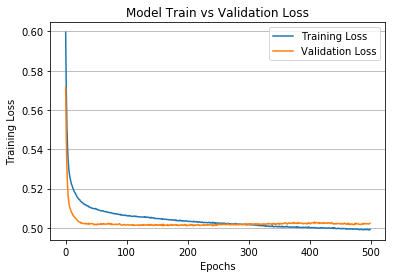

In [34]:
# Plot validation loss
plt.plot(valid.history['loss'])
plt.plot(valid.history['val_loss'])
plt.title('Model Train vs Validation Loss')
plt.ylabel('Training Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss','Validation Loss'])
plt.grid(axis='y')
fig1 = plt.gcf()
plt.show()

In [35]:
fig1.savefig('overfit.png', dpi=100, bbox_inches="tight")

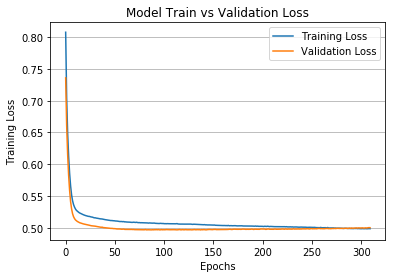

In [67]:
# Plot validation loss
plt.plot(main.history['loss'])
plt.plot(main.history['val_loss'])
plt.title('Model Train vs Validation Loss')
plt.ylabel('Training Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss','Validation Loss'])
plt.grid(axis='y')
fig2 = plt.gcf()
plt.show()

In [68]:
fig2.savefig('fit.png', dpi=100, bbox_inches="tight")

In [69]:
# Accuracy on light/dense model
def pred_count(heart_cvd):
    corr = 0
    wron = 0
    for index, row in heart_cvd.iterrows():
        if row['predicted'] == row['actual']:
            corr = corr + 1
        else:
            wron = wron + 1

    print(f'Correct predictions: {corr}')
    print(f'Incorrect predictions: {wron}')

predictions = main_model.predict_classes(X_test_scaled)
test_df = pd.DataFrame({'predicted':np.ravel(predictions),'actual':np.ravel(y_test)})
pred_count(test_df)

Correct predictions: 1767
Incorrect predictions: 561


In [53]:
#Export to json
import json
with open('main_cvd.json', 'w') as f:
    json.dump(main.history, f)

In [54]:
import json
with open('main_cvd.json', 'r') as f:
        history = json.load(f) 

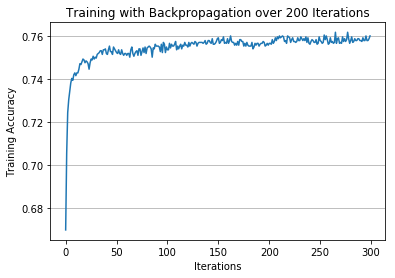

In [55]:
plt.plot(history['acc'])
plt.title('Training with Backpropagation over 200 Iterations')
plt.ylabel('Training Accuracy')
plt.xlabel('Iterations')
plt.grid(axis='y')

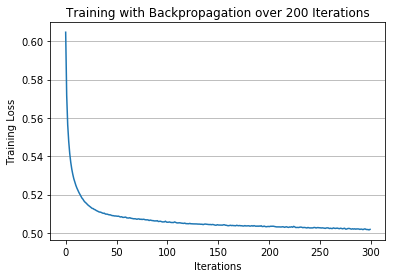

In [56]:
plt.plot(history['loss'])
plt.title('Training with Backpropagation over 200 Iterations')
plt.ylabel('Training Loss')
plt.xlabel('Iterations')
plt.grid(axis='y')

# Saving a Trained Model
We can save our trained models using the HDF5 binary format with the extension `.h5`

In [70]:
# Save the main model
main_model.save("framingham_cvd.h5")

In [38]:
# Save the main model
valid_model.save("valid_cvd.h5")

# Loading a Model

In [71]:
import pandas as pd
# Load the model
from keras.models import load_model
cvd_model = load_model("framingham_cvd.h5")

In [39]:
from keras.models import load_model
cvd_model = load_model("valid_cvd.h5")

## Evaluating the loaded model

In [72]:
#Load the light model
model_loss, model_accuracy = cvd_model.evaluate(
    X_test_scaled, y_test, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.5103779284609962, Accuracy: 0.7590206183518741


In [73]:
# create a sample "good" patient, not from data
#SEX, AGE, CIGPDAY, HEARTRTE, SYSBP, BPMEDS, TOTCHOL, BMI, GLUCOSE, DIABETES, EDUC_2.0, EDUC_3.0, EDUC_4.0
##(age) + (cigs) (chol) (bmi) (glu) (hr) (bp) (female)

pt = {'SEX':[1],'AGE':[60],'CIGPDAY':[90],'HEARTRTE':[95],'SYSBP':[180],
     'TOTCHOL':[200],'BMI':[35],'GLUCOSE':[200]}
bad_patient = pd.DataFrame(pt)

# return probability of response (cvd)
cvd_model.predict_proba(bad_patient)

array([[0.9999939]], dtype=float32)

In [74]:
print(f"Predicted class: {cvd_model.predict_classes(bad_patient)}")

Predicted class: [[1]]


In [75]:
# create a sample "good" patient, not from data
#SEX, AGE, CIGPDAY, HEARTRTE, SYSBP, BPMEDS, TOTCHOL, BMI, GLUCOSE, DIABETES, EDUC_2.0, EDUC_3.0, EDUC_4.0
##(age) + (cigs) (chol) (bmi) (glu) (hr) (bp) (female)

pt2 = {'SEX':[1],'AGE':[50],'CIGPDAY':[0],'HEARTRTE':[65],'SYSBP':[180],
     'TOTCHOL':[120],'BMI':[23],'GLUCOSE':[99]}
good_patient = pd.DataFrame(pt2)

# return probability of response (cvd)
cvd_model.predict(good_patient)

array([[1.]], dtype=float32)

In [76]:
print(f"Predicted class: {cvd_model.predict_classes(good_patient)}")

Predicted class: [[1]]


In [77]:
# create a sample "good" patient, not from data
#SEX, AGE, CIGPDAY, HEARTRTE, SYSBP, BPMEDS, TOTCHOL, BMI, GLUCOSE, DIABETES, EDUC_2.0, EDUC_3.0, EDUC_4.0
##(age) + (cigs) (chol) (bmi) (glu) (hr) (bp) (female)

pt3 = {'SEX':[0],'AGE':[0],'CIGPDAY':[0],'HEARTRTE':[0],'SYSBP':[0],
     'TOTCHOL':[0],'BMI':[0],'GLUCOSE':[0]}
good_patient = pd.DataFrame(pt3)

# return probability of response (cvd)
cvd_model.predict_proba(good_patient)

array([[0.24918282]], dtype=float32)